<a href="https://colab.research.google.com/github/pavi-1994/Coronaviruse_tweet_analysis/blob/main/CoronaViruse_Tweet_Aanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CoronaViruse Tweet Aanlysis**

##Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.


The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [69]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing regular expression
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing data

In [3]:
#importing dataset
path="/content/drive/MyDrive/almabetter/module 4/corornaviruse_tweet analysis/Coronavirus Tweets.csv"
corona_df=pd.read_csv(path, encoding='latin-1')

### First View Of Data

In [4]:
#last 5 rows of the dataset
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
#last 5 rows of the dataset
corona_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Creating the copy of dataset


In [6]:
#create a copy
crn_df=corona_df.copy()

Lets see shape and size of the data

In [7]:
#no. of rows and columns
corona_df.shape

(41157, 6)

In [8]:
#details about columns
corona_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
# datatypes of features present in the dataframe
print(f'Feature datatype of customer_df :\n\n {corona_df.dtypes}')

Feature datatype of customer_df :

 UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object


In [10]:
# check no of unique element present in each feature (columns)
corona_df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [11]:
#detailed information of the data
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
#percentage of missing values
def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')

In [13]:
#missing value counts and percentage
missing_value_percent(corona_df)

Missing Data Count
Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Location         20.87
UserName          0.00
ScreenName        0.00
TweetAt           0.00
OriginalTweet     0.00
Sentiment         0.00
dtype: float64%


<Axes: >

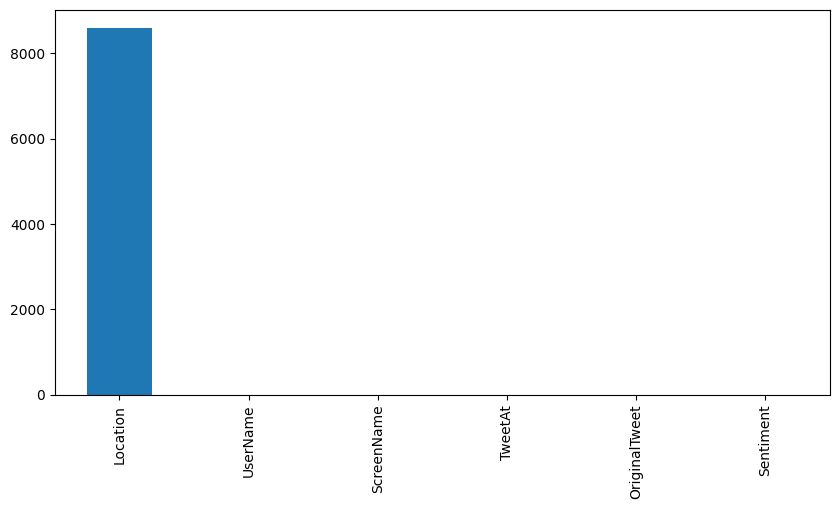

In [14]:
#plotting graph
plt.figure(figsize=(10,5))
corona_df.isnull().sum().sort_values(ascending=False).plot(kind="bar")

### Count of dupicate values

In [15]:
# count of duplicate rows
print(f' Number of duplicated observation present in the dataset:{corona_df.duplicated().sum()}')

 Number of duplicated observation present in the dataset:0


### **Details about the data**
we observed the dataset contains 6 features  

• Username : gives the name of the user (int64)

• Screenname: gives the screen name of the user (int64)

• Location: gives information regarding the location from which tweet is sent

• Tweet At: gives the date of the Tweet

• Original Tweet : Tweet Content

and sentiment as dependent feature

By detailed study we observed that the dataset the feature Location include missing values that is around 20% of total data.

In [16]:
#using describe function and including all numerical as well as categorical feature
corona_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


In [17]:
corona_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

### Visualization of the categorical feature


In [18]:
def visualize_feature(df,feature):

    '''function takes feature name as input and 
    prints the output of features value_count , visualize using pie plot and countplot'''
    print(f'value_count of {feature}')
    print(df[feature].value_counts())

    print("\n\n")
    
    # Visualize feature
    #visualization through pie plot
    df[feature].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

###**Target Variable**:

In [19]:
# To find the unique values in sentiment column
corona_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

value_count of Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64





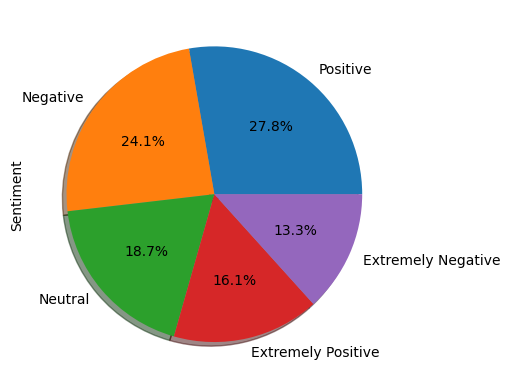

In [20]:
visualize_feature(corona_df,"Sentiment")

## Based on location

In [21]:
#Top 10 locations of tweet
location_based_top_tweetcount=corona_df['Location'].value_counts().head(10)
loc_df = pd.DataFrame(location_based_top_tweetcount)
loc_df.reset_index(inplace=True)
# rename the columns
loc_df = loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


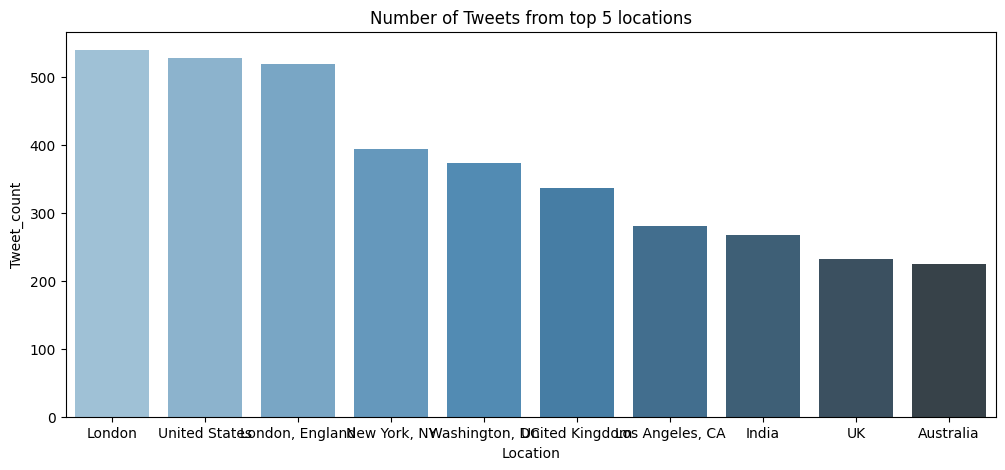

In [22]:
#visualisation of number of tweets from top 10 locations
plt.figure(figsize=[12,5])
sns.barplot(x=loc_df['Location'],y=loc_df['Tweet_count'],palette='Blues_d')
plt.title("Number of Tweets from top 5 locations")
plt.show()

from these we can observe that the top countries from where  the tweet is made is high in count is UK and US

In [23]:
#checking the dates of tweeting
corona_df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [24]:
print('value_count of "TweetAt"')
print(corona_df["TweetAt"].value_counts())


value_count of "TweetAt"
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64


In [25]:
#Top 5 locations of tweet
datebased_top_tweetcount=corona_df['TweetAt'].value_counts().head(12)
date_df = pd.DataFrame(datebased_top_tweetcount)
date_df.reset_index(inplace=True)
# rename the columns
date_df = date_df.rename(columns={'index':'date_TweetAt', 'TweetAt':'Tweet_count'})
date_df

,date_TweetAt,Tweet_count
0,20-03-2020,3448
1,19-03-2020,3215
2,25-03-2020,2979
3,18-03-2020,2742
4,21-03-2020,2653
5,22-03-2020,2114
6,23-03-2020,2062
7,17-03-2020,1977
8,08-04-2020,1881
9,07-04-2020,1843


Text(0.5, 1.0, 'Number of tweets with repect to date')

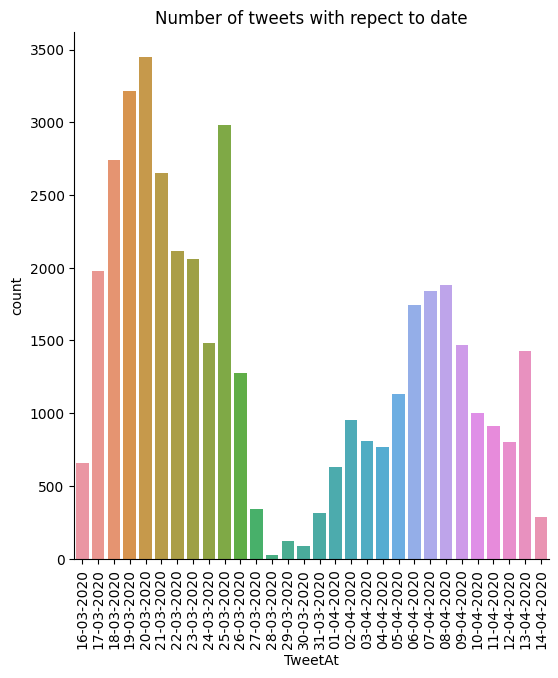

In [26]:
#visualisation of tweets with respect  to date
sns.catplot(x='TweetAt',height=6,kind='count',data=corona_df)
plt.xticks(rotation = 90)
plt.title("Number of tweets with repect to date")

As we observed 20-03-2020 and 19-03-2020 are the date on which heighest tweets are made


Here we can see the tweets which lies within first 20 rows based on diiferent sentiment like Positive,negative,Neutral,Extremely Negative,Extremely Positive.

In [48]:
#To view entire text
pd.set_option('display.max_colwidth', None)

In [49]:
corona_df[corona_df['Sentiment']=='Extremely Positive'].loc[:20,'OriginalTweet']

11                                                    Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.
12                  #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh
18    Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a statement. ÂToday this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3
Name: OriginalTweet, dtype: object

In [50]:
corona_df[corona_df['Sentiment']=='Positive'].loc[:20,'OriginalTweet']

1                                                                                         advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2                                                                                                                                                                                                   Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
3     My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
5               

In [51]:
corona_df[corona_df['Sentiment']=='Extremely Negative'].loc[:20,'OriginalTweet']

4     Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
20                                                                           with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale
Name: OriginalTweet, dtype: object

In [52]:
corona_df[corona_df['Sentiment']=='Negative'].loc[:20,'OriginalTweet']

9    For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona
Name: OriginalTweet, dtype: object

In [53]:
corona_df[corona_df['Sentiment']=='Neutral'].loc[:20,'OriginalTweet']

0                                                                                                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
7                                                                                                                                                            Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ
10    All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9
16                                                                   ????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ?

From these tweet we observed that these tweet contains many punctuation marks,website link, numbers

**Remove the urls present in the dataset.**

In [54]:

#removing urls from dataset
corona_df['cleaned_tweet'] = corona_df['OriginalTweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')

In [55]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**Remove the @ from tweet**

In [58]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [63]:
# create new column with removed @user
corona_df['cleaned_tweet'] = np.vectorize(remove_pattern)(corona_df['cleaned_tweet'], '@[\w]*')

In [64]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak","Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral","My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement","Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**Removing Punctuations, Numbers, and Special Characters**

In [65]:
# remove special characters, numbers, punctuations
corona_df['cleaned_tweet'] = corona_df['cleaned_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [66]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confinement #Confinementotal #ConfinementGeneral,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes shortage #CoronavirusFrance #restezchezvous #StayAtHome #confinement,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**Removing words smaller than length 2**

In [67]:
# remove short words
corona_df['cleaned_tweet'] = corona_df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [68]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confinement #Confinementotal #ConfinementGeneral,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #restezchezvous #StayAtHome #confinement,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**##Removing stopwords from cleaned Tweet using nltk.stopwords**

In [70]:
stopword_nltk = stopwords.words('english')
print(stopword_nltk)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
##Removing stopwords from cleaned Tweet using nltk.stopwords

sw_nltk = stopwords.words('english')
print(sw_nltk)
